In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from FingerPrint_Encoding import FingerprintGenerator
from Predictions_ML import Predict

In [2]:
data = pd.read_csv('PATH_TO_YOUR_DATA.csv')

In [2]:
data = pd.read_csv('AID_687023_datatable_label_WD.csv')

In [4]:
#ADD label Column if didn't exit
# data['label'] = data['Activity'].apply(lambda x: 1 if x == 'Active' else 0)

In [3]:
model = "rdk_fp"
fingerprint_generator = FingerprintGenerator(model)
mols = fingerprint_generator.set_molecules(data)
rd_test=fingerprint_generator.generate_fingerprints()

In [4]:
y_test = data.label.values

# MLP

In [5]:
try:
    with open('MLP_HIV.pkl', 'rb') as f:
        mlp_model = pickle.load(f)
except Exception as e:
    print(f"An error occurred while loading the pickle file: {e}")

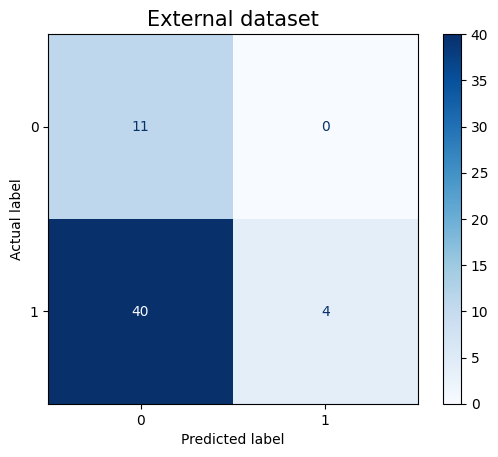

In [6]:
m =  Predict (model_name = "MLP")
df_mlp = m.predictions(mlp_model,data, rd_test, y_test)

# RF

In [7]:
try:
    with open('RF_HIV.pkl', 'rb') as f:
        rf_model = pickle.load(f)
except Exception as e:
    print(f"An error occurred while loading the pickle file: {e}")

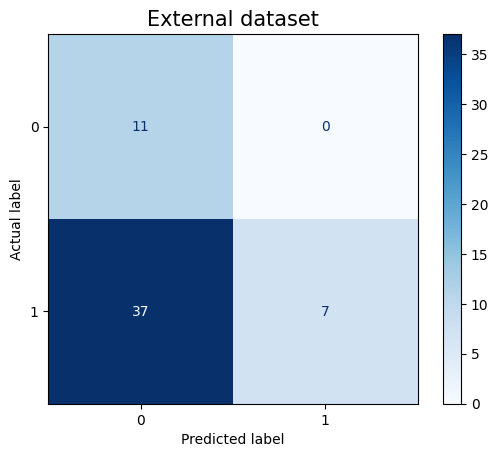

In [9]:
m = Predict(model_name='RF')
df_rf = m.predictions(rf_model, data, rd_test, y_test)